In [34]:
# Add the project root to the Python path so we can import from sibling folders like `utils/`
import sys
import os
sys.path.append(os.path.abspath(".."))


# Imports
# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display


# machine learning
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# utils
import importlib
from utils import visualize
importlib.reload(visualize)

from utils.visualize import visualize_overview, plot_numerics, plot_categoricals, describe_custom, split_and_append_column, sum_columns, plot_violin, plot_count

In [35]:
# Load training data
train_data = pd.read_csv("../data/train.csv")


describe_custom(train_data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,null,null%,dtype
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,object
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201,2.312205,object
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217,2.496261,object
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199,2.289198,object
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182,2.093639,object
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0,179,2.059128,float64
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203,2.335212,object
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0,181,2.082135,float64
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0,183,2.105142,float64
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0,208,2.392730,float64


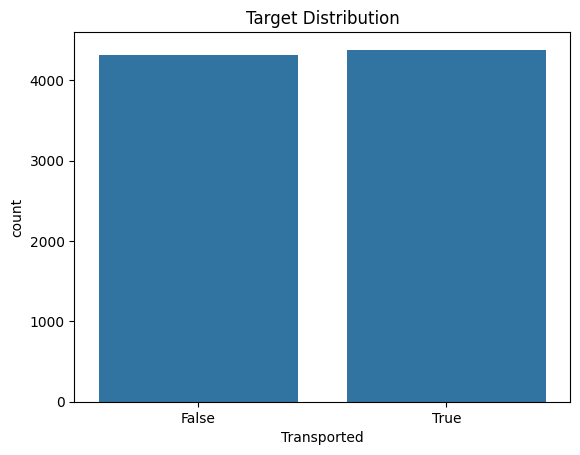

In [6]:
# Run overview
visualize_overview(train_data, 'Transported')

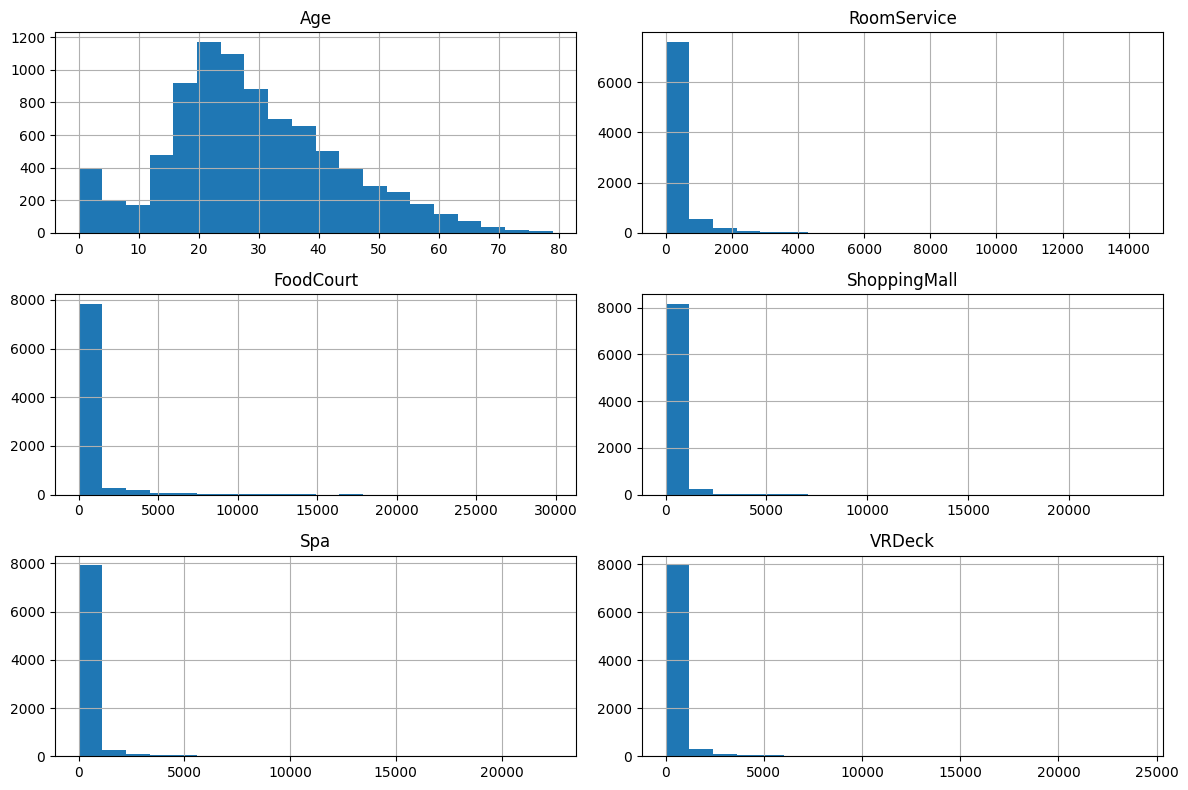

In [7]:
# Plot numeric columns
plot_numerics(train_data, ['Age', 'Cabin', 'RoomService', 'Destination', 'HomePlanet' , 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

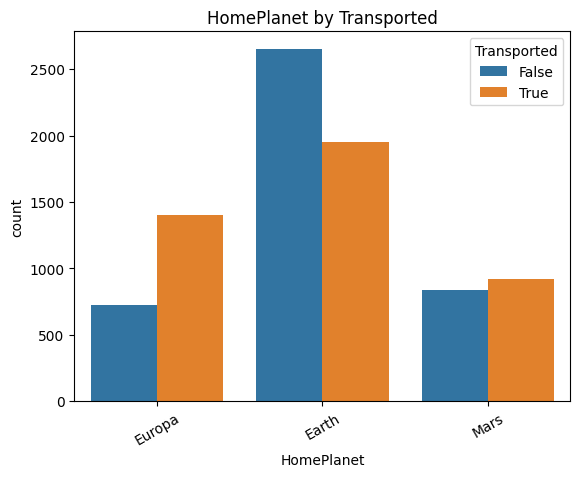

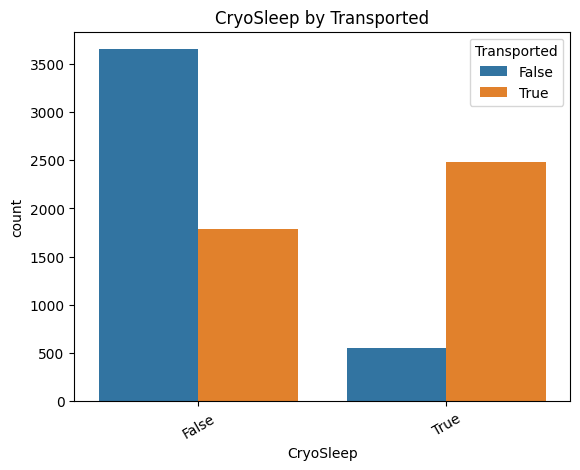

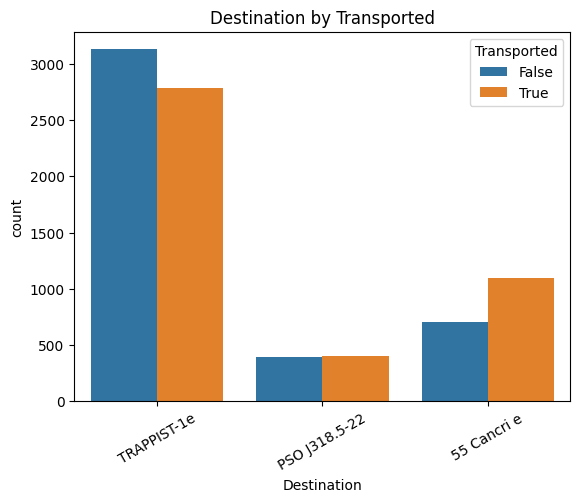

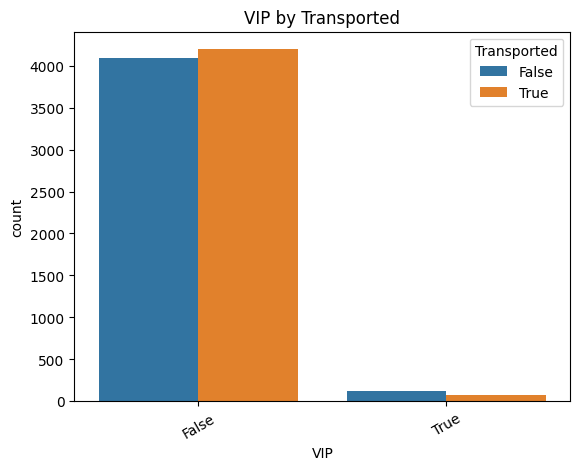

In [8]:
# Plot categoricals
plot_categoricals(train_data, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], 'Transported')

In [40]:
describe_better(split_and_append_column(train_data, 'Cabin', '/', ['CabinDeck', 'CabinNum', 'CabinSide']))

,dtype,count,null,null%,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,object,8693,0,0.000000,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,object,8492,201,2.312205,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,object,8476,217,2.496261,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,object,8494,199,2.289198,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,object,8511,182,2.093639,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,8514.0,179,2.059128,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,object,8490,203,2.335212,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,float64,8512.0,181,2.082135,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,float64,8510.0,183,2.105142,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,float64,8485.0,208,2.392730,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In [46]:
train_data_processed = sum_columns(train_data, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 'TotalSpend')

describe_better(train_data_processed)

,dtype,count,null,null%,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,object,8693,0,0.000000,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,object,8492,201,2.312205,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,object,8476,217,2.496261,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,object,8494,199,2.289198,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,object,8511,182,2.093639,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,float64,8514.0,179,2.059128,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,object,8490,203,2.335212,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,float64,8512.0,181,2.082135,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,float64,8510.0,183,2.105142,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,float64,8485.0,208,2.392730,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


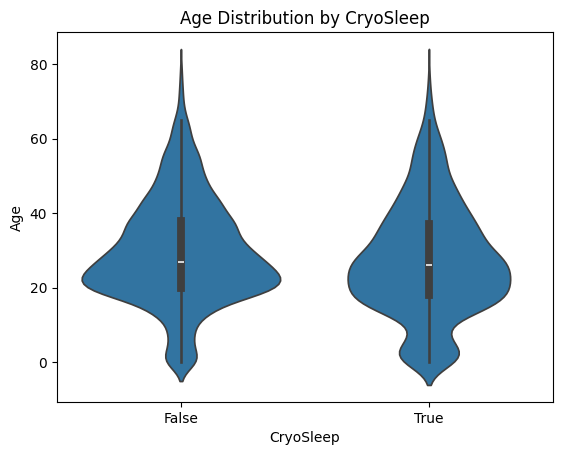

In [42]:
plot_violin(train_data, 'CryoSleep', 'Age', 'Age Distribution by CryoSleep')

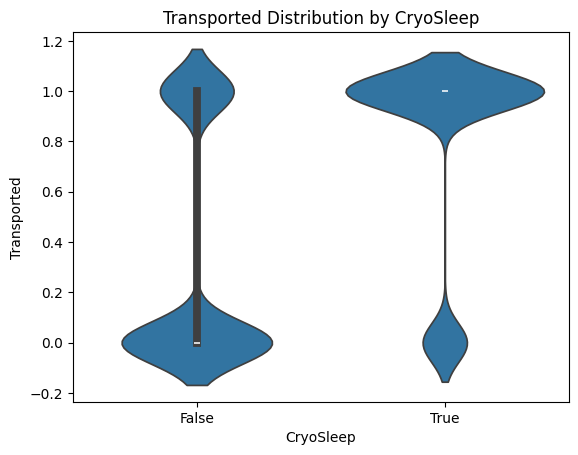

In [48]:
plot_violin(train_data, 'CryoSleep', 'Transported', 'Transported Distribution by CryoSleep')

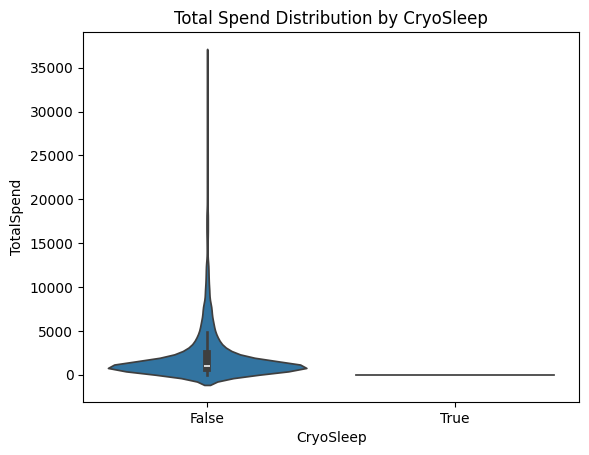

In [47]:
plot_violin(train_data_processed, 'CryoSleep', 'TotalSpend', 'Total Spend Distribution by CryoSleep')

In [51]:
pd.crosstab(train_data_processed['CryoSleep'], train_data_processed['Transported'], normalize='index')

Transported,False,True
CryoSleep,,
False,0.671079,0.328921
True,0.182417,0.817583
